# Explore here

In [50]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Problema:

Calcúlar válor de prima, para cada uno de los clientes de la aseguradora según datos físiologicos

In [52]:
# Clasificación de variables y valores faltantes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [53]:
def separar_columnas(df):
    # Listas vacías para almacenar los nombres de las columnas categóricas y numéricas
    categoricas = []
    numericas = []
    
    # Iterar por las columnas del DataFrame
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numericas.append(col)
        else:
            categoricas.append(col)
    
    return print(f'Categóricas: {categoricas}\nNúmericas: {numericas}')

separar_columnas(df)

Categóricas: ['sex', 'smoker', 'region']
Númericas: ['age', 'bmi', 'children', 'charges']


In [54]:
# Verificación de filas duplicadas

print(f'Filas Duplicadas: {df.duplicated().sum()}')

# Eliminación de filas duplicadas

df = df.drop_duplicates()
print(f'Filas Duplicadas tras eliminación: {df.duplicated().sum()}')

df

Filas Duplicadas: 1
Filas Duplicadas tras eliminación: 0


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


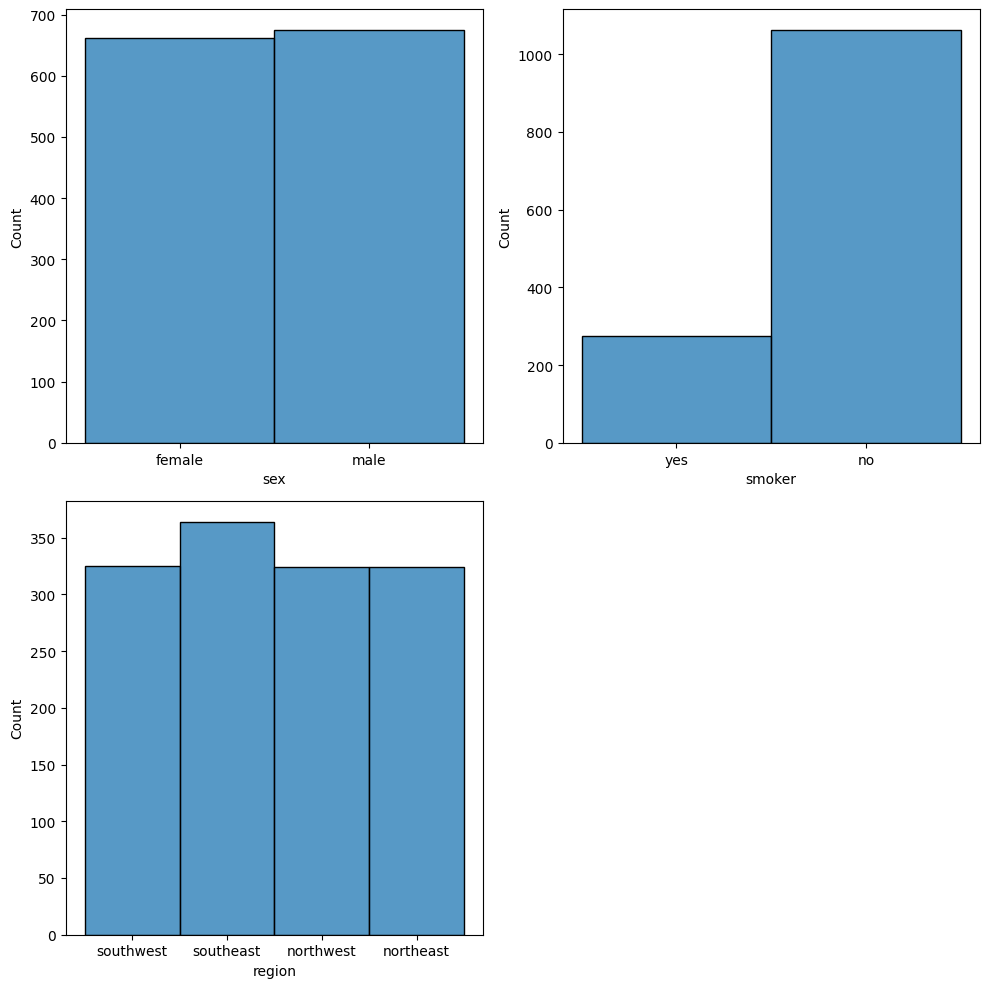

In [55]:
# Análisis Univariante 
    #Categorico

fig, axis = plt.subplots(2,2,figsize=(10,10))

#histogramas
sns.histplot(ax= axis[0,0],data=df,x='sex')
sns.histplot(ax= axis[0,1],data=df,x='smoker')
sns.histplot(ax= axis[1,0],data=df,x='region')


fig.delaxes(axis[1,1])
plt.tight_layout()
plt.show()

In [56]:
separar_columnas(df)

Categóricas: ['sex', 'smoker', 'region']
Númericas: ['age', 'bmi', 'children', 'charges']


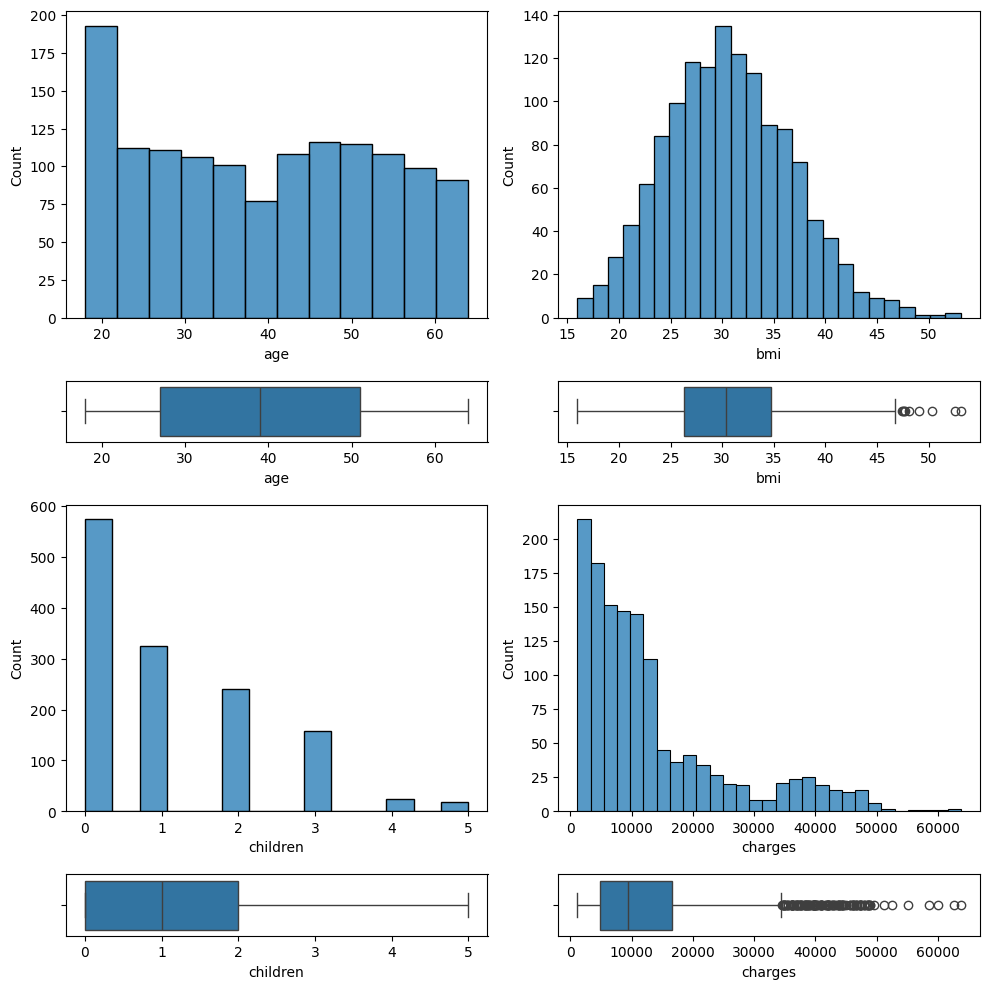

In [57]:
    # Númerico

fig, axis = plt.subplots(4,2,figsize=(10,10),gridspec_kw={"height_ratios":[5,1,5,1]}) 

sns.histplot(ax=axis[0,0],data=df,x='age')
sns.boxplot(ax=axis[1,0],data=df,x='age')

sns.histplot(ax=axis[0,1],data=df,x='bmi')
sns.boxplot(ax=axis[1,1],data=df,x='bmi')

sns.histplot(ax=axis[2,0],data=df,x='children')
sns.boxplot(ax=axis[3,0],data=df,x='children')

sns.histplot(ax=axis[2,1],data=df,x='charges')
sns.boxplot(ax=axis[3,1],data=df,x='charges')

plt.tight_layout()
plt.show()
            

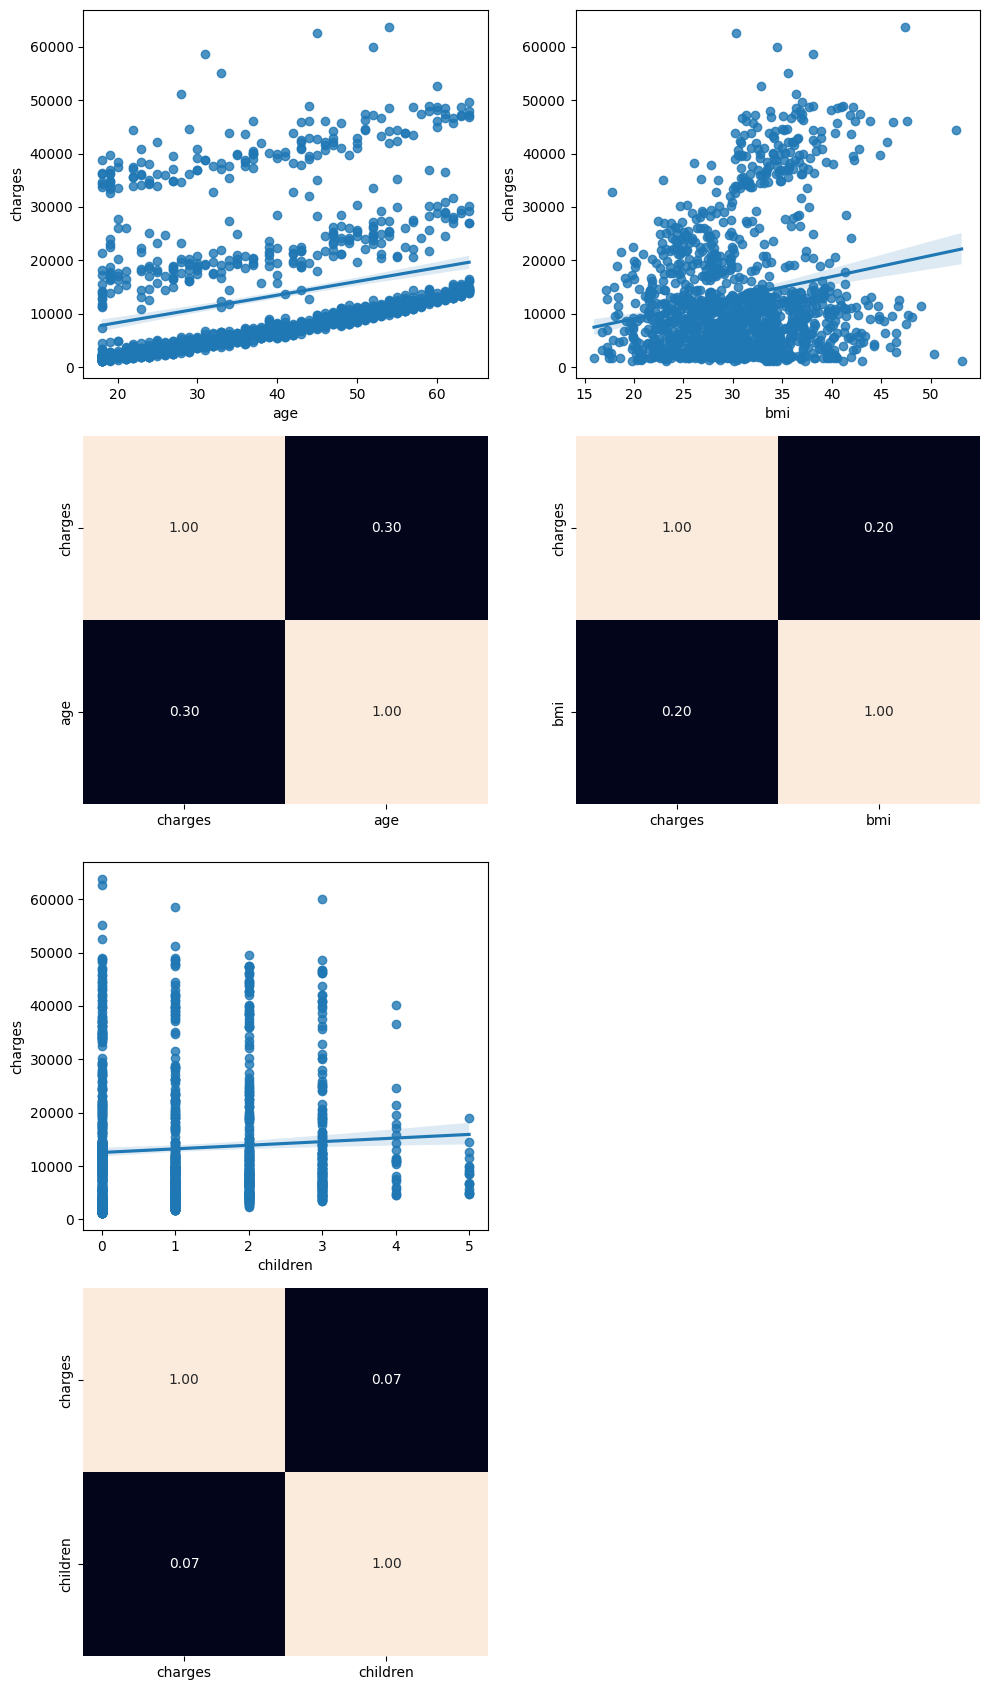

In [58]:
# Análisis Multivariante
    # Númerico - númerico

fig, axis = plt.subplots(4,2,figsize=(10,17))

sns.regplot(ax=axis[0,0], data=df, x="age", y="charges")
sns.heatmap(df[['charges','age']].corr(),annot=True,fmt='.2f',ax=axis[1,0],cbar=False)

sns.regplot(ax=axis[0,1], data=df, x="bmi", y="charges")
sns.heatmap(df[['charges','bmi']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax=axis[2,0], data=df, x="children", y="charges")
sns.heatmap(df[['charges','children']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)

fig.delaxes(axis[3,1])
fig.delaxes(axis[2,1])
plt.tight_layout()
plt.show()

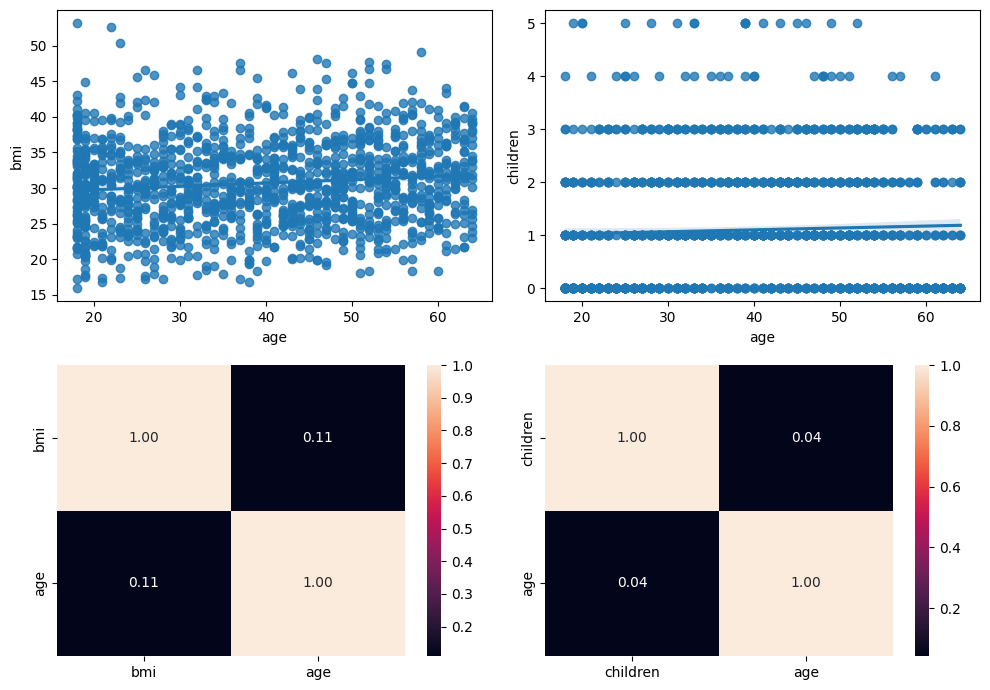

In [59]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0,0], data = df, x = "age", y = "bmi")
sns.heatmap(df[["bmi", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0])

sns.regplot(ax = axis[0,1], data = df, x = "age", y = "children")
sns.heatmap(df[["children", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1])


plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

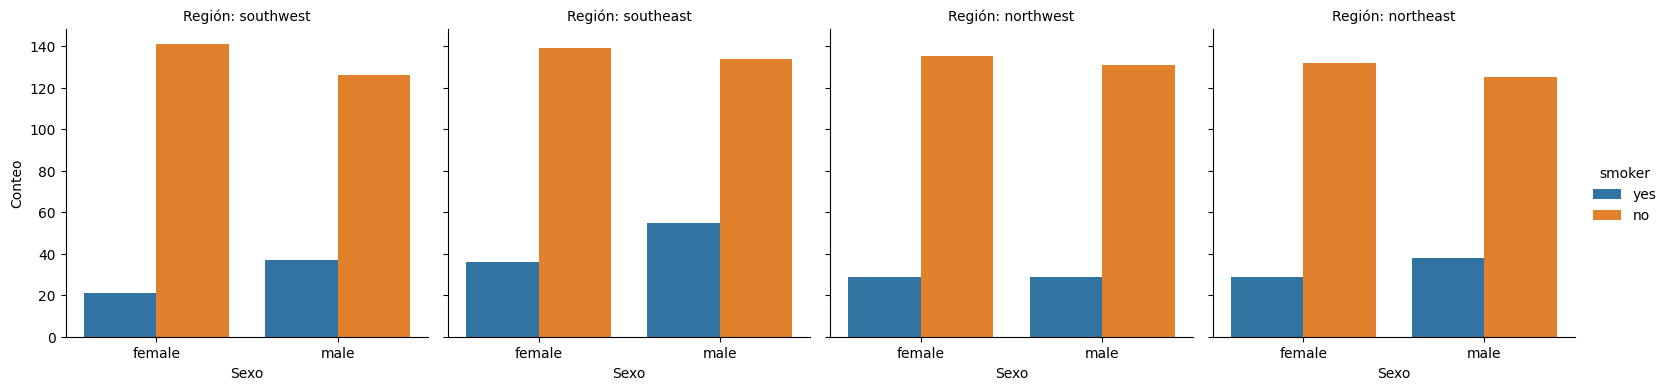

In [60]:
    #Análisi Categórico - Categórico

plt.figure(figsize=(10, 6))

g = sns.catplot(data=df, x='sex', hue='smoker', col='region', kind='count', height=4, aspect=1)
g.set_axis_labels('Sexo', 'Conteo')
g.set_titles(col_template='Región: {col_name}')
plt.show()



In [61]:
    # Factorización de variables cátegoricas

df['sex'] = pd.factorize(df['sex'])[0]
df['smoker'] = pd.factorize(df['smoker'])[0]
df['region'] = pd.factorize(df['region'])[0]


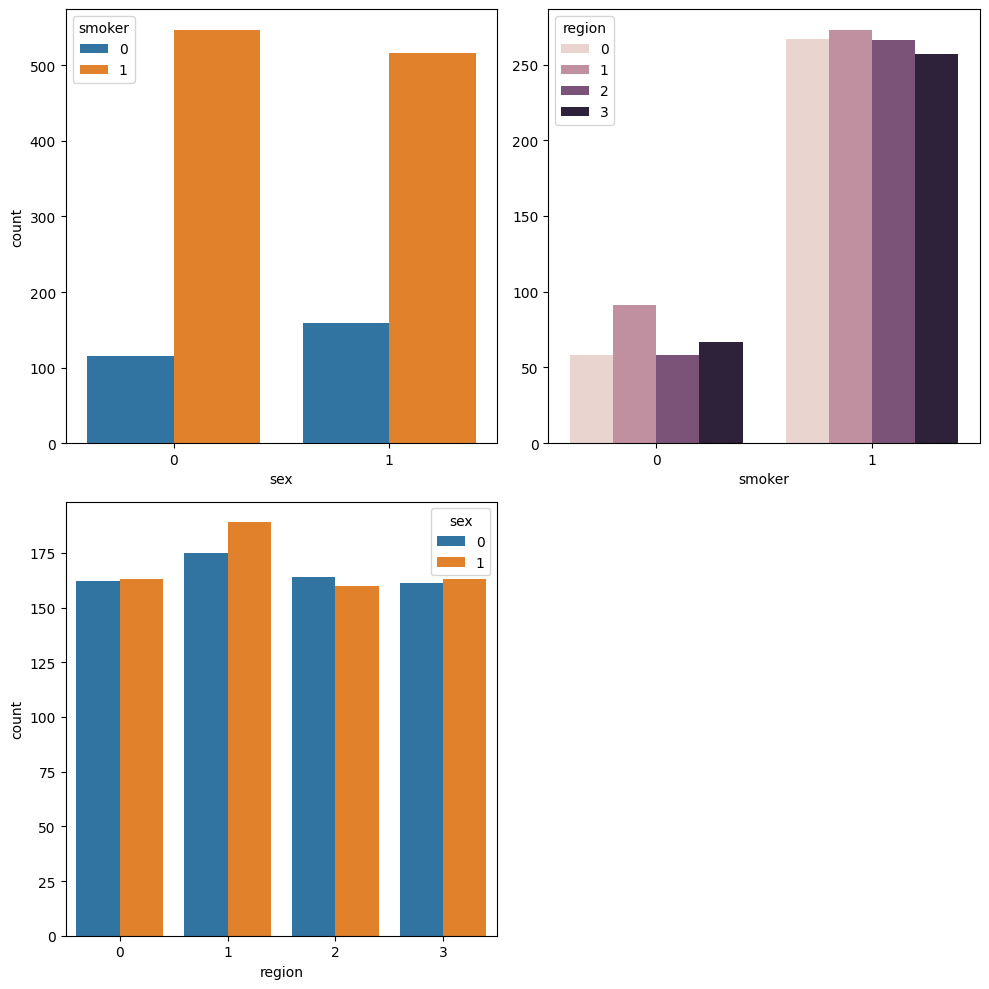

In [62]:

fig, axis = plt.subplots(2, 2, figsize = (10, 10))

sns.countplot(ax = axis[0, 0], data = df, x = "sex", hue = "smoker",)
sns.countplot(ax = axis[0, 1], data = df, x = "smoker", hue = "region").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = df, x = "region", hue = "sex")

fig.delaxes(axis[1, 1])
plt.tight_layout()
plt.show()

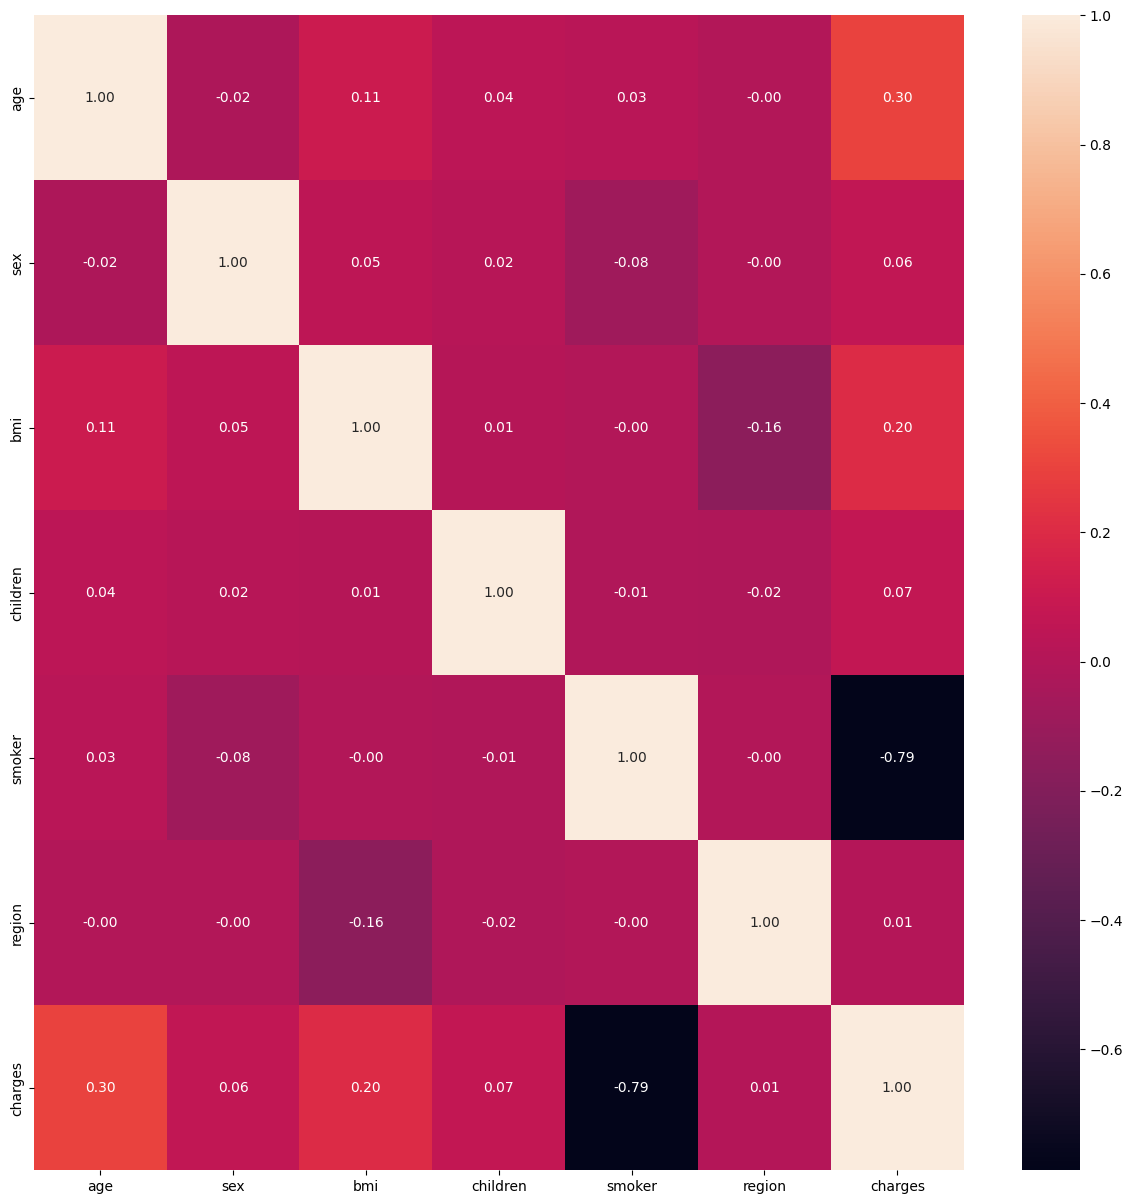

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

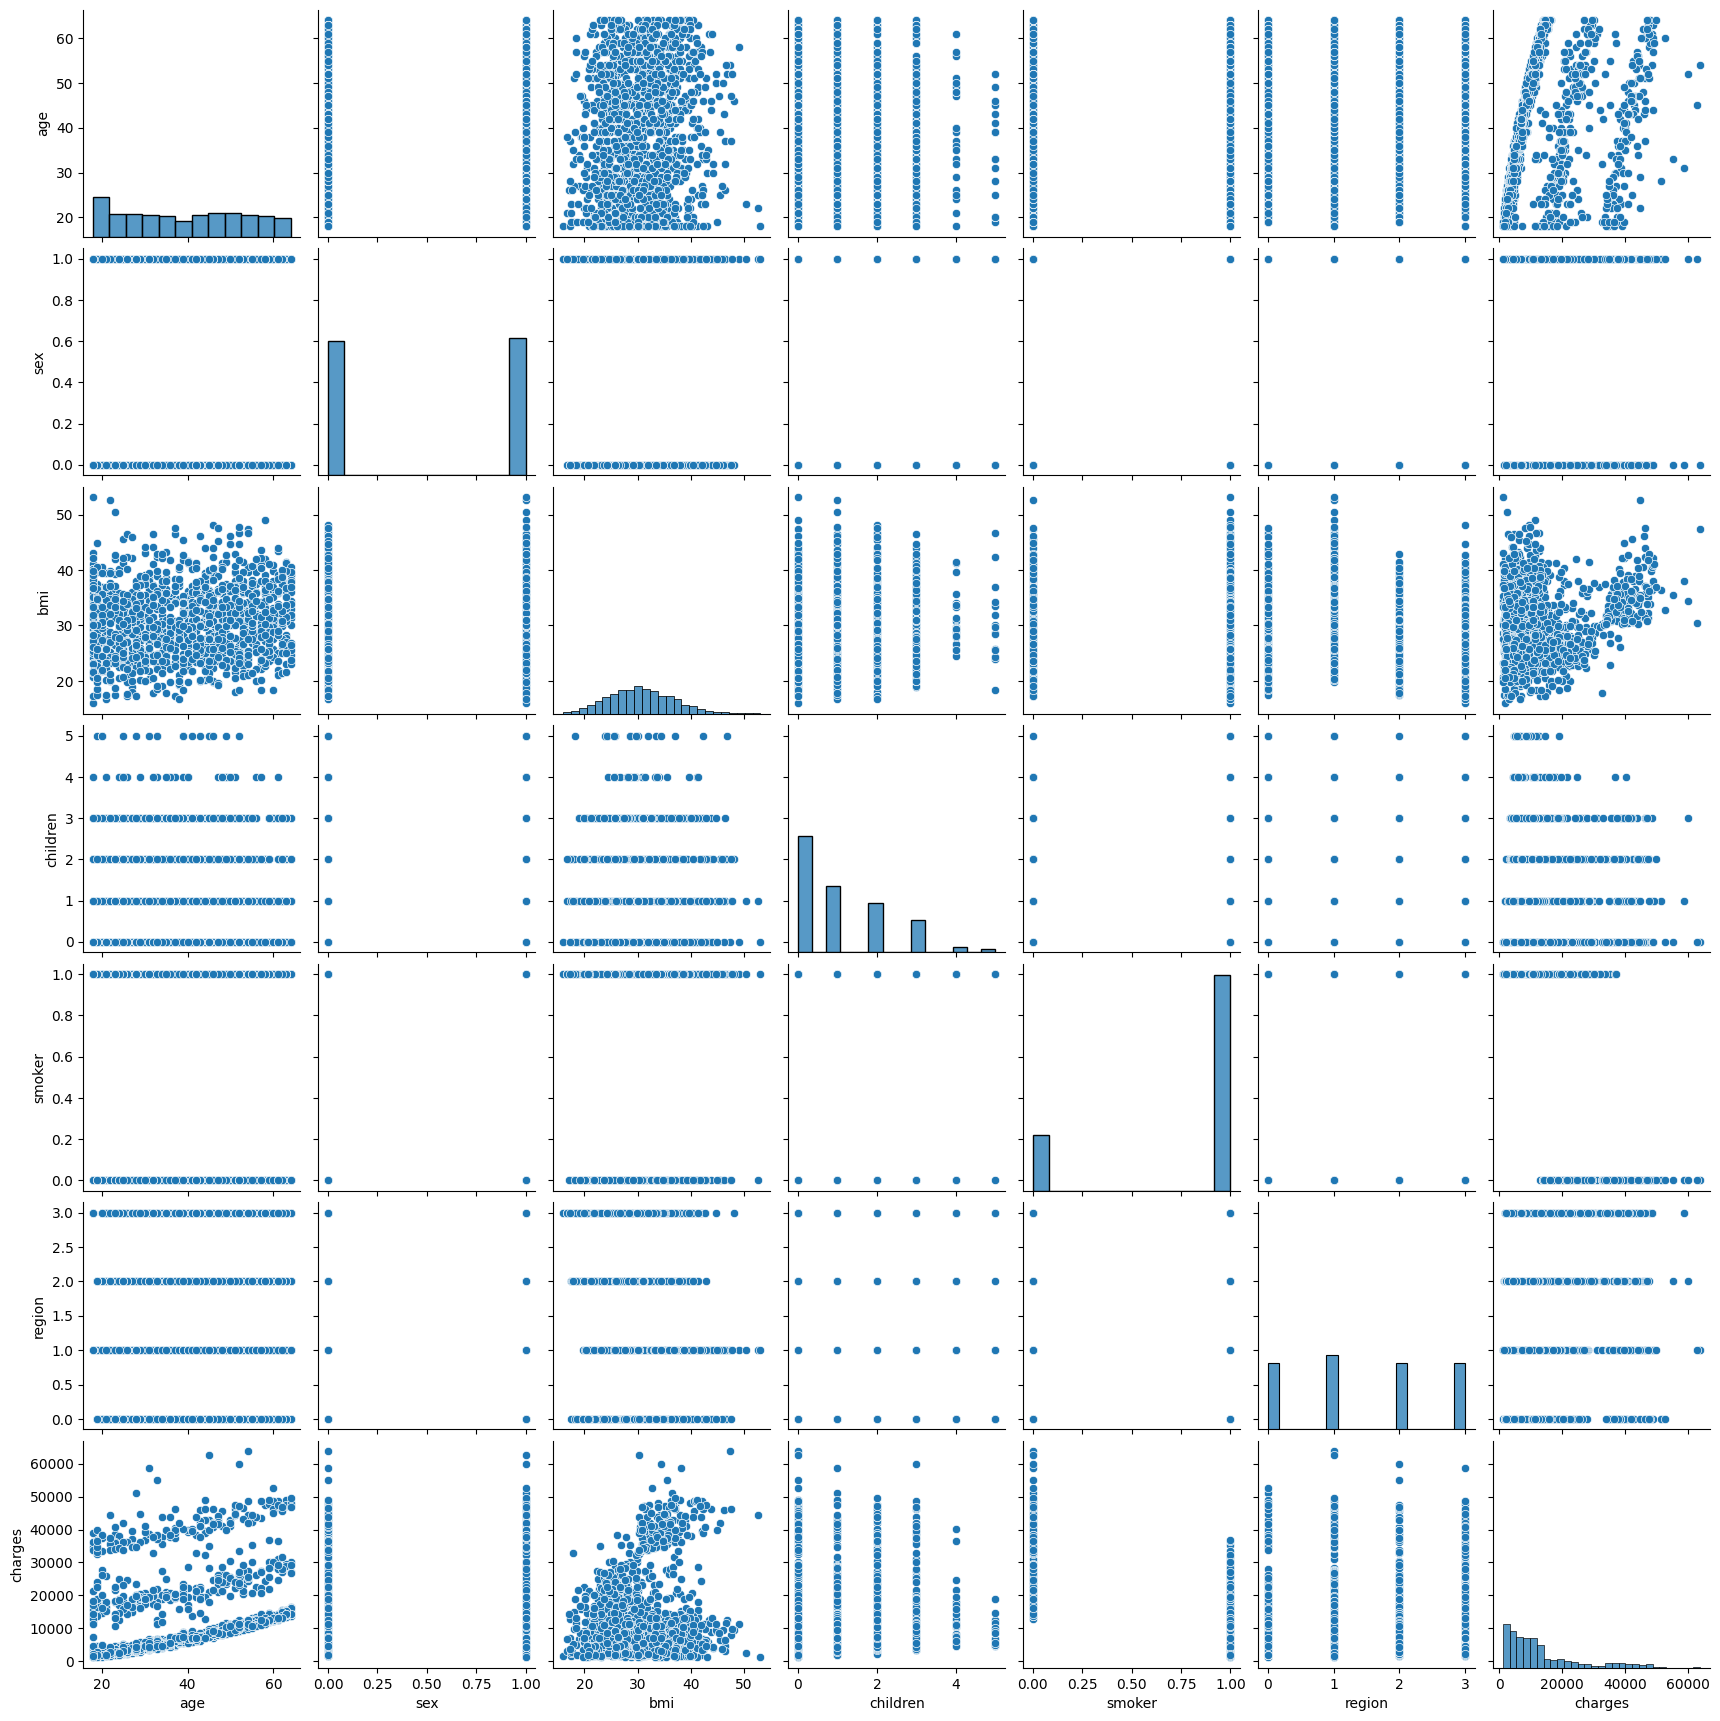

In [64]:
sns.pairplot(df)


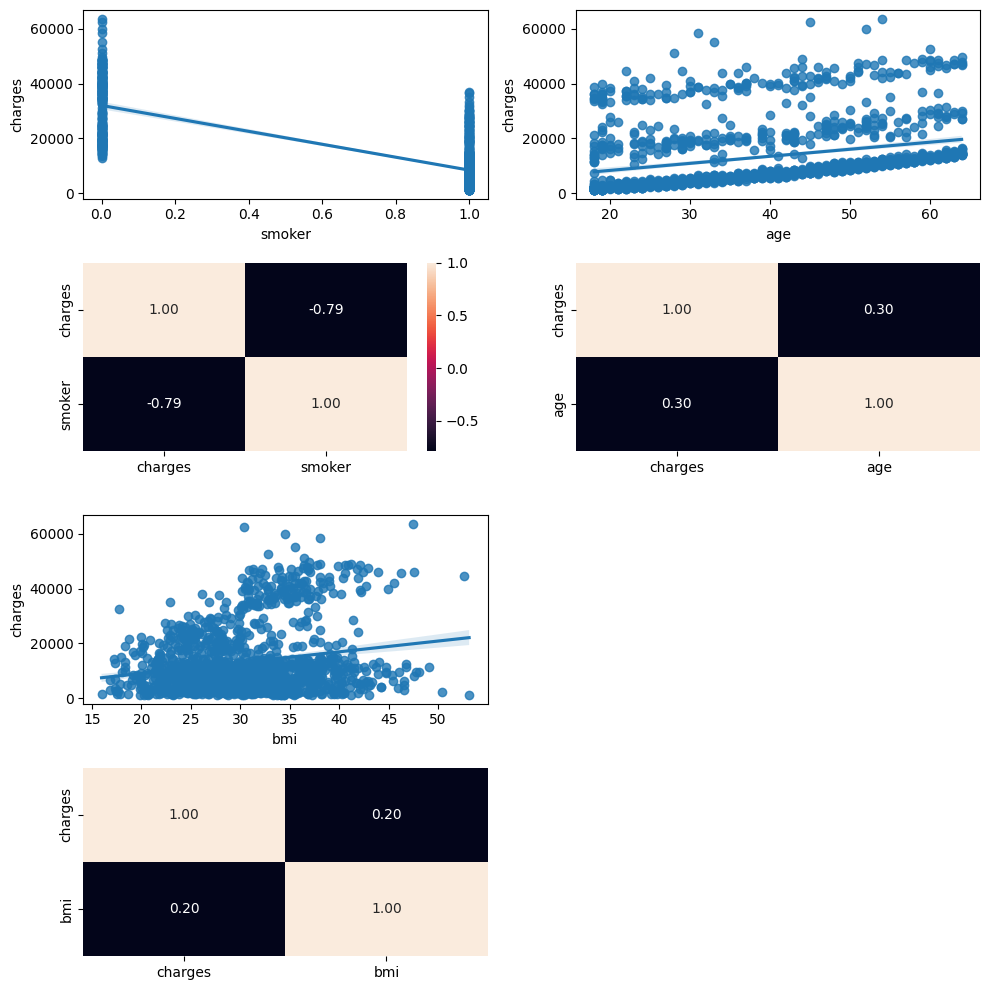

In [65]:
# Comprobación de Linealidad

fig, axis = plt.subplots(4,2,figsize=(10,10))

sns.regplot(ax=axis[0,0], data=df, x="smoker", y="charges")
sns.heatmap(df[['charges','smoker']].corr(),annot=True,fmt='.2f',ax=axis[1,0])

sns.regplot(ax=axis[0,1], data=df, x="age", y="charges")
sns.heatmap(df[['charges','age']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax=axis[2,0], data=df, x="bmi", y="charges")
sns.heatmap(df[['charges','bmi']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)
fig.delaxes(axis[2,1])
fig.delaxes(axis[3,1])
plt.tight_layout()
plt.show()

In [66]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


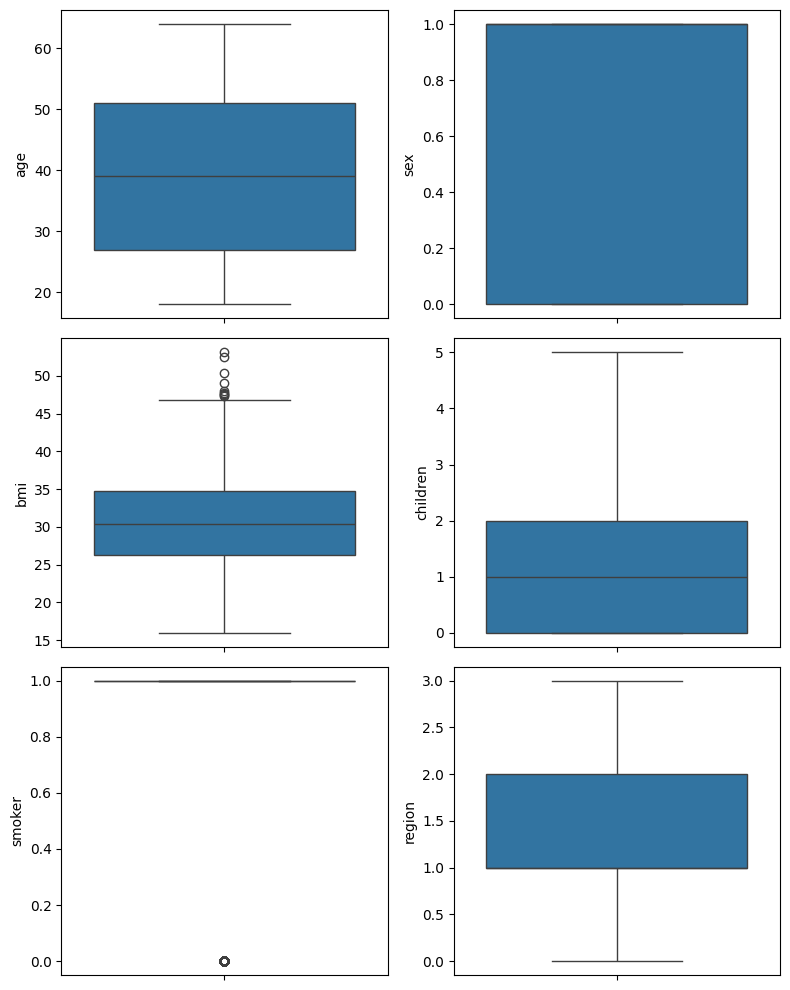

In [67]:
# Analisamos los Outliers con boxplots

fig, axes =plt.subplots(3,2,figsize=(8,10))

sns.boxplot(ax=axes[0,0],data=df,y='age')
sns.boxplot(ax=axes[0,1],data=df,y='sex')
sns.boxplot(ax=axes[1,0],data=df,y='bmi')
sns.boxplot(ax=axes[1,1],data=df,y='children')
sns.boxplot(ax=axes[2,0],data=df,y='smoker')
sns.boxplot(ax=axes[2,1],data=df,y='region')

plt.tight_layout()
plt.show()

In [68]:
def analisis_ric(columna,df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'Rango Intercuratílico: {ric}')
    print(f'Límite superior: {lim_sup} \nLímite inferior: {lim_inf}')

analisis_ric('bmi',df)

Rango Intercuratílico: 8.410000000000004
Límite superior: 47.31500000000001 
Límite inferior: 13.674999999999994


In [69]:
print(df[df['bmi']>=47].count())
print(df[df['bmi']<13].count())

age         9
sex         9
bmi         9
children    9
smoker      9
region      9
charges     9
dtype: int64
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [70]:
df = df[df['bmi']<47]
print(df[df['bmi']>=47].count())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [78]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Análisis:

Mejores Variables Predictoras: 

    Ya que se utilizará un Algórtimo de Regresión Líneal en este ejercicio, buscamos variables con una relación líneal directa con la variable objetivo.

    Tras realizar el EDA se eligen que las variables con mayor correlación con la variabre objetivo son: 'age', 'bmi' y 'smoker' 





Linealidad: Las variables seleccionadas tienen una relación lineal con el objetivo ('charges'), se observa en el Análisis anterior.

Independencia: 

Homoscedasticidad:

Normalidad de los Errores:

Ausencia de multicolinealidad: Las correlaciones entre las variables predictoras son muy bajas o nular, se aprecia en los gráficos multivariantes hechos en el EDA








In [71]:
separar_columnas(df)

Categóricas: []
Númericas: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [96]:
df_eda = df[['age', 'bmi','children','smoker', 'charges']]
df_eda

,age,bmi,children,smoker,charges
0,19,27.900,0,0,16884.92400
1,18,33.770,1,1,1725.55230
2,28,33.000,3,1,4449.46200
3,33,22.705,0,1,21984.47061
4,32,28.880,0,1,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,1,10600.54830
1334,18,31.920,0,1,2205.98080
1335,18,36.850,0,1,1629.83350
1336,21,25.800,0,1,2007.94500


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler

# Separar características y objetivo

X = df_eda.drop(['charges'], axis=1)
y = df_eda['charges']

# Dividir en conjunto de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Selección de características con SelectKBest (Ensayo y Error)

selector = SelectKBest(score_func=f_classif, k=4)
X_train_sel = selector.fit_transform(X_train, y_train)

# Aplicar la transformación a los datos de prueba

X_test_sel = selector.transform(X_test)

# Obtener las columnas seleccionadas

selected_features = selector.get_support(indices=True)
best_columns = X.columns[selected_features]
print("Columnas seleccionadas:", best_columns)

# Escalar las características seleccionadas con MinMaxScaler

scaler = MinMaxScaler()
X_train_esc = scaler.fit_transform(X_train_sel) 
X_test_esc = scaler.transform(X_test_sel)  

Columnas seleccionadas: Index(['age', 'bmi', 'children', 'smoker'], dtype='object')


/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [124]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_esc,y_train)

LinearRegression()

In [128]:
y_pred = model.predict(X_test_esc)

from sklearn.metrics import mean_squared_error, r2_score

print(f'Los coheficientes del modelo es: {model.coef_}')
print(f'El intercepto del modelo es: {model.intercept_}')
print(f'El MSE es: {mean_squared_error(y_pred,y_test)}')
print(f'El R2 es: {r2_score(y_pred,y_test)}')

Los coheficientes del modelo es: [ 11934.36823176  10035.22664295   2584.86615782 -23738.03581515]
El intercepto del modelo es: 21206.136800465632
El MSE es: 34837442.508177064
El R2 es: 0.6860937665728635


In [133]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import pandas as pd
import warnings

# Omitir advertencias
def warn(*args, **kwargs):
    pass
warnings.warn = warn

# Definir el modelo de regresión lineal regularizada con Ridge
model = Ridge()

# Definir la grilla de hiperparámetros
grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100],  # Valores de regularización
    "fit_intercept": [True, False],  # Ajustar o no la intersección
    "solver": ["auto", "svd", "cholesky", "lsqr", "saga"]  # Diferentes solvers para optimización
}

# Definir la búsqueda en la grilla con validación cruzada
grid_search = GridSearchCV(model, grid, scoring="r2", cv=5)

# Ajustar el grid search al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y convertir a DataFrame
best_params_df = pd.DataFrame([grid_search.best_params_])
print(best_params_df)

   alpha  fit_intercept solver
0      1           True   saga


In [134]:
best_eda_model = grid_search.best_estimator_
resultado = r2_score(best_eda_model.predict(X_test_esc),y_test)
print(f'Best EDA model Accuracy: {resultado}')

Best EDA model Accuracy: -4.64074628365627


EDA

Linealidad: La variable objetivo y la(s) predictora(s) tienen una relación lineal.
Independencia: Las observaciones son independientes unas de otras.
Homoscedasticidad: La varianza de los errores (es decir, las diferencias entre las predicciones del modelo y los datos reales) es constante en todos los niveles de las variables independientes.
Normalidad de los errores: Los errores están normalmente distribuidos. Esto es importante para la realización de pruebas estadísticas y para construir intervalos de confianza.
Ausencia de multicolinealidad: En una regresión múltiple, las variables independientes no están perfectamente correlacionadas entre sí. Si hay correlación perfecta, se dice que los datos tienen multicolinealidad (hay variables que son iguales) y dificulta el cálculo de los coeficientes.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [26]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<Axes: >

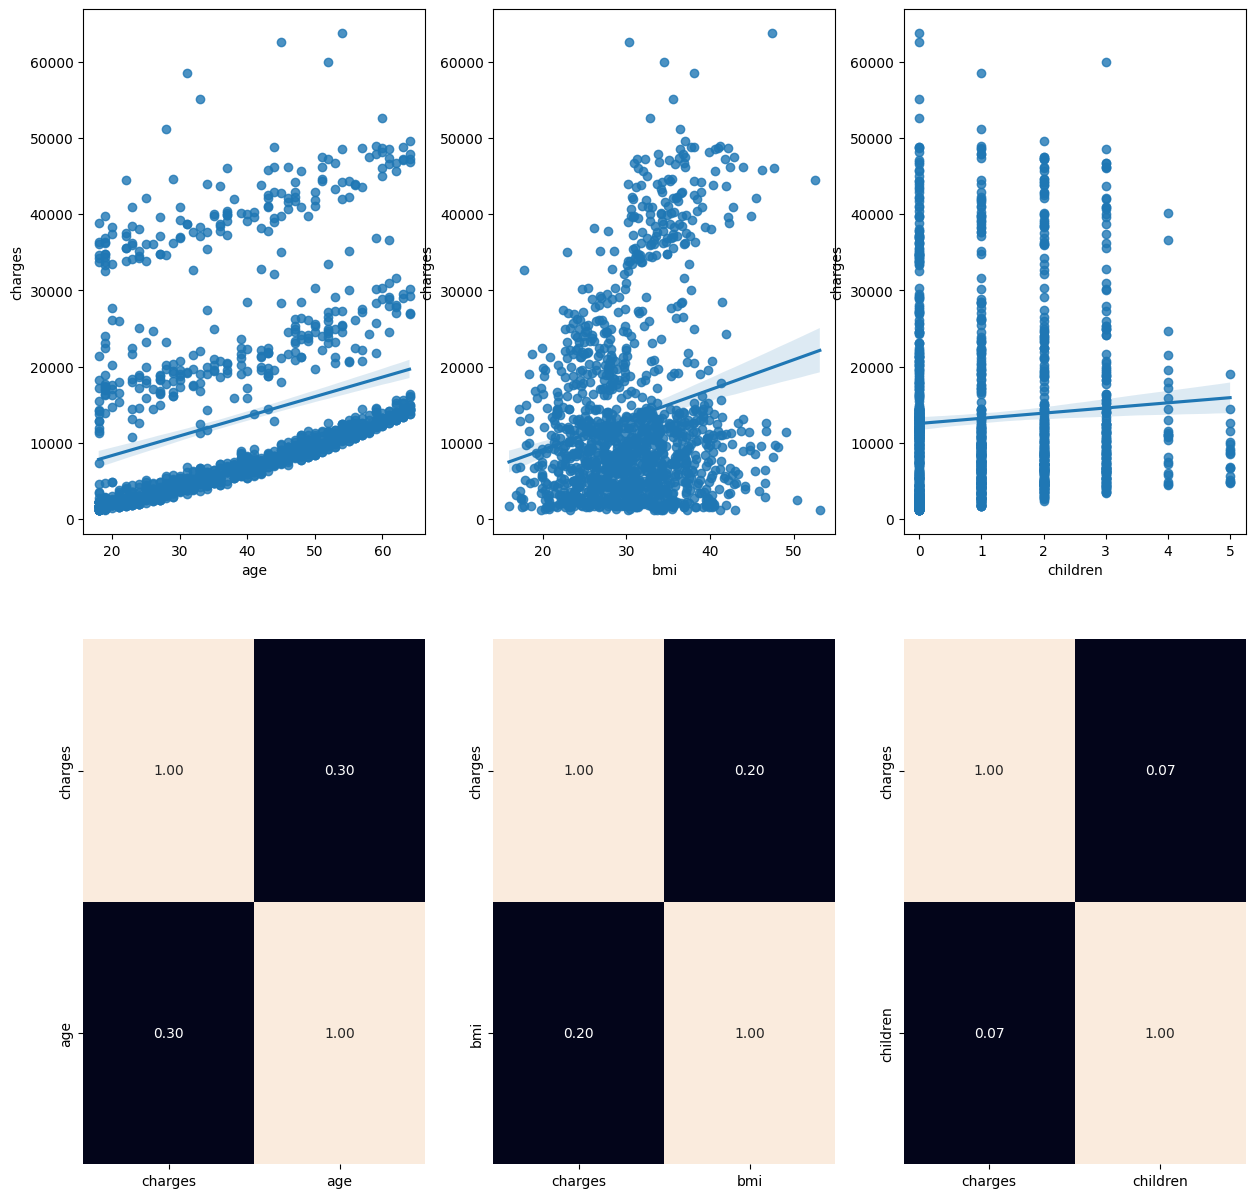

In [27]:
fig, axis = plt.subplots(2,3,figsize=(15,15))

sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges")
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = df, x = "children", y = "charges")
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)


Despues del EDA

In [28]:
df['sex_n'] = pd.factorize(df['sex'])[0]
df['smoker_n'] = pd.factorize(df['smoker'])[0]
df['region_n'] = pd.factorize(df['region'])[0]
df

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,0,27.900,0,0,0,16884.92400,0,0,0
1,18,1,33.770,1,1,1,1725.55230,1,1,1
2,28,1,33.000,3,1,1,4449.46200,1,1,1
3,33,1,22.705,0,1,2,21984.47061,1,1,2
4,32,1,28.880,0,1,2,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830,1,1,2
1334,18,0,31.920,0,1,3,2205.98080,0,1,3
1335,18,0,36.850,0,1,1,1629.83350,0,1,1
1336,21,0,25.800,0,1,0,2007.94500,0,1,0


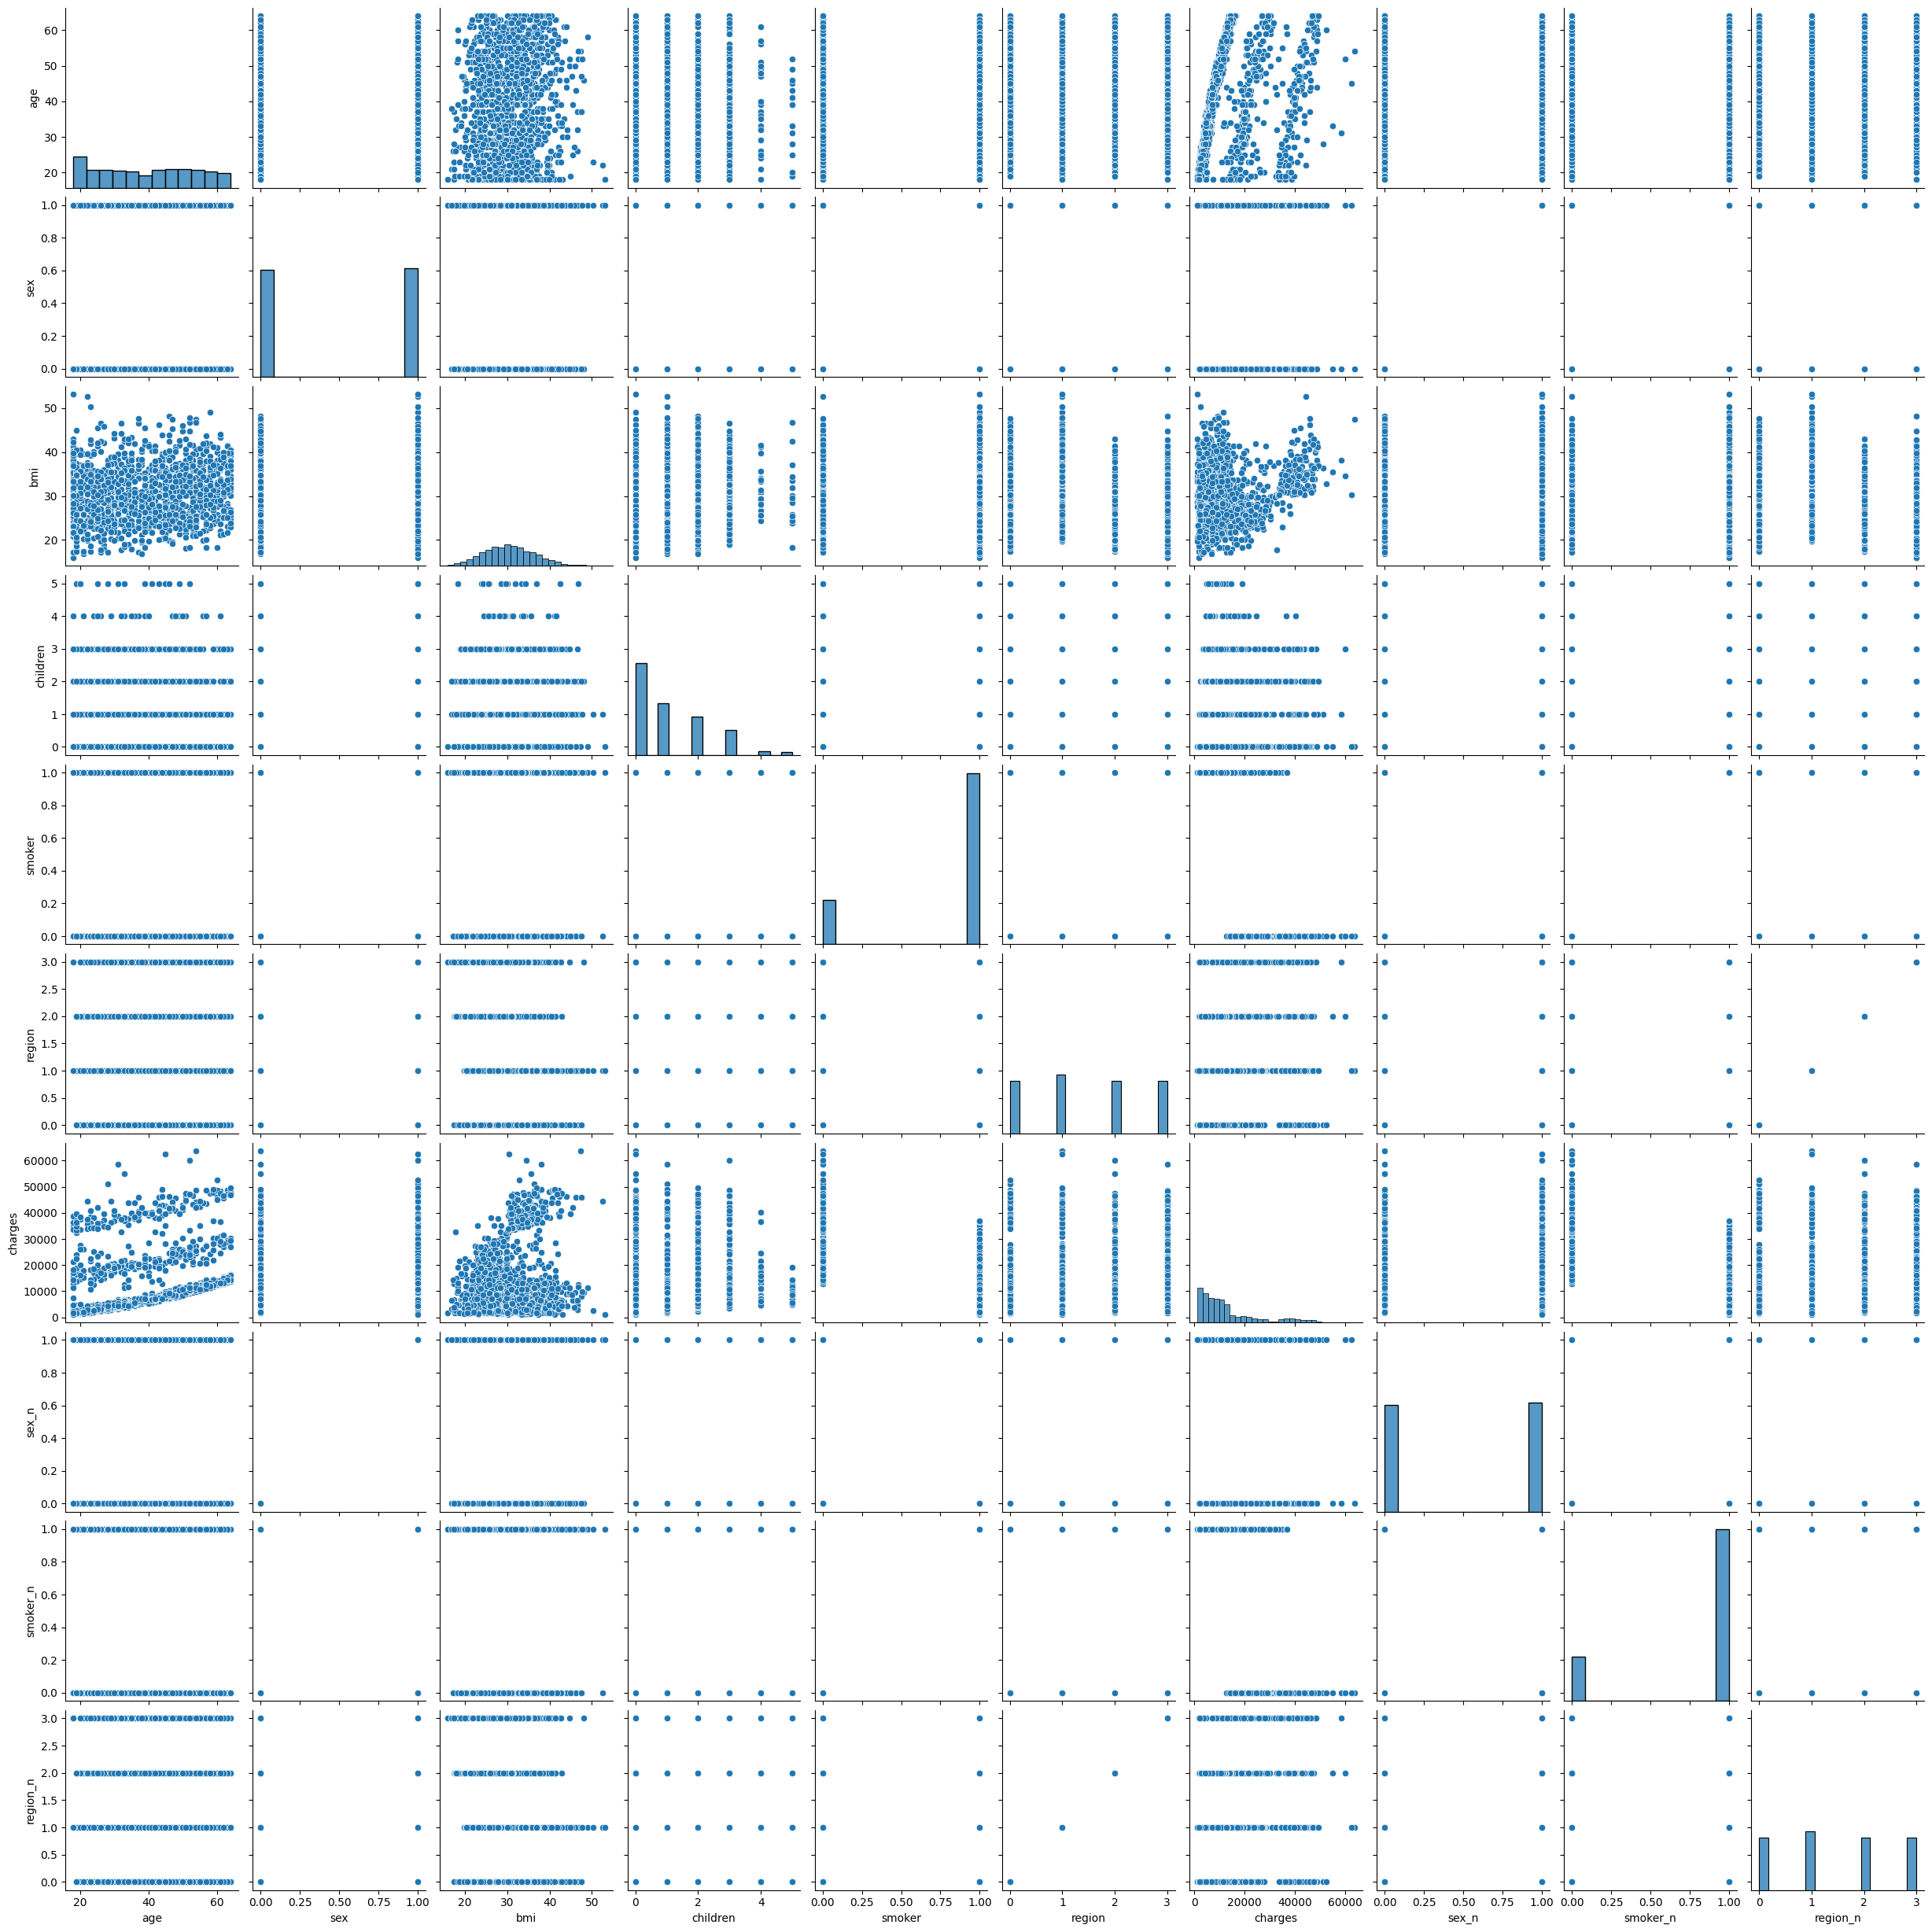

In [29]:
sns.pairplot(df)

In [30]:
df_final = df[['sex_n','age', 'bmi', 'children', 'smoker_n', 'region_n', 'charges']]
df_final.head()

,sex_n,age,bmi,children,smoker_n,region_n,charges
0,0,19,27.900,0,0,0,16884.92400
1,1,18,33.770,1,1,1,1725.55230
2,1,28,33.000,3,1,1,4449.46200
3,1,33,22.705,0,1,2,21984.47061
4,1,32,28.880,0,1,2,3866.85520


In [31]:
from sklearn.model_selection import train_test_split

X= df_final.drop(['charges'], axis=1)
y= df_final['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.4,random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
print(f'los coheficientes del modelo es: {model.coef_}')
print(f'el intercepto del modelo es: {model.intercept_}')

los coheficientes del modelo es: [  -151.64416933    239.59802179    312.38702845    575.92521775
 -22345.70986779    267.64010826]
el intercepto del modelo es: 10649.829410913044


In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'El MSE es: {mean_squared_error(y_pred,y_test)}')
print(f'El R2 es: {r2_score(y_pred,y_test)}')

El MSE es: 38188698.62628036
El R2 es: 0.6117473838858999


In [36]:
df_final_2 = df_final.drop(['sex_n','region_n'],axis=1)
X = df_final_2.drop(['charges'], axis=1)
y = df_final_2['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model2 = LinearRegression()
model2.fit(X_train,y_train)

y_pred2 = model2.predict(X_test)

print(f'El intercepto es: {model2.intercept_}')
print(f'Los coheficientes es: {model2.coef_}')

print(f'El MSE es: {mean_squared_error(y_pred2,y_test)}')
print(f'El R2 es: {r2_score(y_pred2,y_test)}')


El intercepto es: 11785.758103268054
Los coheficientes es: [   249.191292      305.26740368    537.9721959  -23042.50723793]
El MSE es: 35914551.48043363
El R2 es: 0.6857060710390246
